In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

import kraft

In [3]:
project_directory = "~/github/celsus"
input_directory = os.path.join(project_directory, "input/")

## GPSMap

In [27]:
point_x_node = pd.read_csv(os.path.join(input_directory, "nmf_k3_w.tsv"), sep="\t", index_col=0)

node_x_point = pd.read_csv(os.path.join(input_directory, "nmf_k3_h.tsv"), sep="\t", index_col=0)

point_ = point_x_node.index.to_numpy()

node_ = point_x_node.columns.to_numpy()

point_name = point_x_node.index.name

point_name = "Gene"

point_x_node = point_x_node.to_numpy()

node_name = "Node"

In [28]:
node_x_node = squareform(pdist(point_x_node.T))

gps_map = kraft.gps_map.GPSMap(
    node_name,
    node_,
    node_x_node,
    point_name,
    point_,
    point_x_node,
)

/Users/kate/github/kraft/kraft/point.py:48: RuntimeWarning:

invalid value encountered in double_scalars



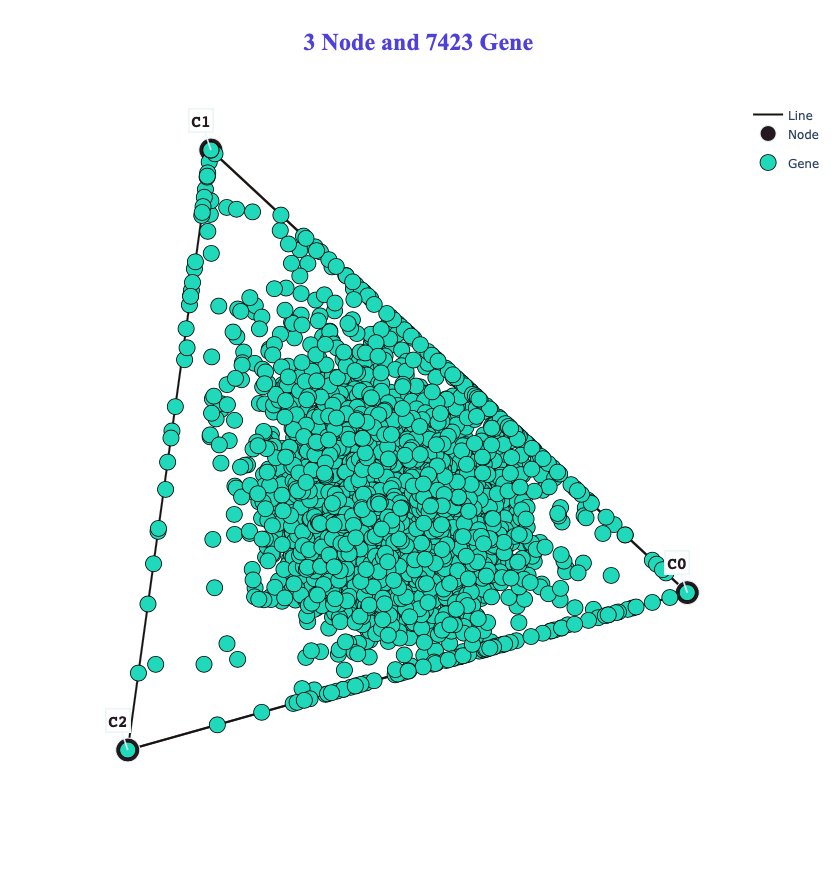

In [29]:
gps_map.plot()

In [7]:
point_highlight_ = np.asarray(("Feature 6", "Feature 10", "Feature 29"))

for point in point_highlight_:

    print(point)

    print(gps_map.point_x_dimension[gps_map.point_ == point])

Feature 6
[]
Feature 10
[]
Feature 29
[]


In [8]:
gps_map.plot(point_highlight_=point_highlight_)

Plotting now...
Made this title: 3 Node and 7423 Name


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
score_name = "Dimension Sum"

score_ = gps_map.point_x_dimension.sum(axis=1)

In [ ]:
gps_map.plot(score_=score_)

In [ ]:
score_[::2] = np.nan

gps_map.plot(score_name=score_name, score_=score_, score_nan_opacity=0.4)

In [ ]:
gps_map.set_group("closest_node")

gps_map.plot()

In [ ]:
gps_map.set_group(gps_map.point_x_dimension.argmax(axis=1))

gps_map.plot()

In [ ]:
gps_map.plot(score_=score_)

In [ ]:
new_point_ = point_highlight_

new_point_x_node = np.concatenate(
    [point_x_node[point_ == point] for point in point_highlight_]
)

new_point_x_node

In [ ]:
gps_map.predict(
    "New", new_point_, new_point_x_node, point_trace={"marker": {"size": 32}}
)

In [ ]:
node_x_point = pd.read_csv("data/kras_gps_map.h.tsv", sep="\t", index_col=0)

node_ = node_x_point.index.to_numpy()

point_ = node_x_point.columns.to_numpy()

node_name = node_x_point.index.name

point_name = "Cell Line"

point_x_node = node_x_point.to_numpy().T

point_x_node = np.apply_along_axis(kraft.array.normalize, 0, point_x_node, "-0-")

point_x_node = point_x_node.clip(min=-3, max=3)

point_x_node = np.apply_along_axis(kraft.array.normalize, 0, point_x_node, "0-1")

point_x_node **= 2

node_x_node = squareform(pdist(point_x_node.T))

gps_map = kraft.gps_map.GPSMap(
    node_name, node_, node_x_node, point_name, point_, point_x_node
)

group_ = (
    pd.read_csv("data/kras_gps_map.k_x_h_point.tsv", sep="\t", index_col=0)
    .loc["K15", :]
    .to_numpy()
)

gps_map.set_group(group_)

gps_map.plot()

In [ ]:
every_n = 10

gps_map.predict("New", point_[::every_n], point_x_node[::every_n])

In [ ]:
path = os.path.expanduser("~/Downloads/gps_map.pickle.gz")

## write

In [ ]:
kraft.gps_map.write(path, gps_map)

## read

In [ ]:
gps_map = kraft.gps_map.read(path)

gps_map.plot()